In [9]:
# prerequisites 
import csv
import os
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import linear_model
from math import log, sqrt

In [10]:
import numpy as np
from math import exp
from math import log2
from numpy.linalg import inv
 
class MyLinearUnivariateRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = 0.0

    # learn a linear univariate regression model by using training inputs (x) and outputs (y) 
    def fit(self, x, y):
        sx = sum(x)
        sy = sum(y)
        sx2 = sum(i * i for i in x)
        sxy = sum(i * j for (i,j) in zip(x, y))
        w1 = (len(x) * sxy - sx * sy) / (len(x) * sx2 - sx * sx)
        w0 = (sy - w1 * sx) / len(x)
        self.intercept_, self.coef_ =  w0, w1

    # predict the outputs for some new inputs (by using the learnt model)
    def predict(self, x):
        if (isinstance(x[0], list)):
            return [self.intercept_ + self.coef_ * val[0] for val in x]
        else:
            return [self.intercept_ + self.coef_ * val for val in x]

in:   [1.51846129 1.19291257 1.18866356 1.39345824 1.09867865]
out:  [1.93599602 1.92269283 1.90672969 1.89786089 1.87568934]


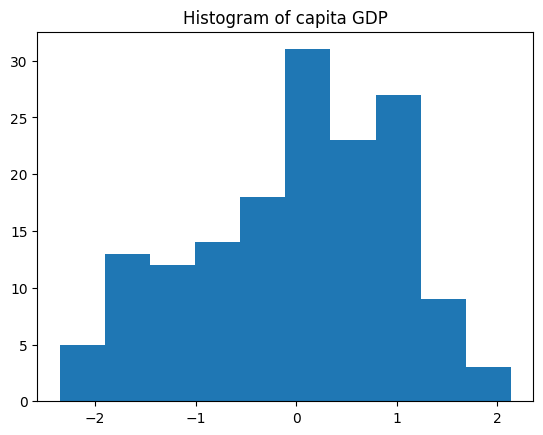

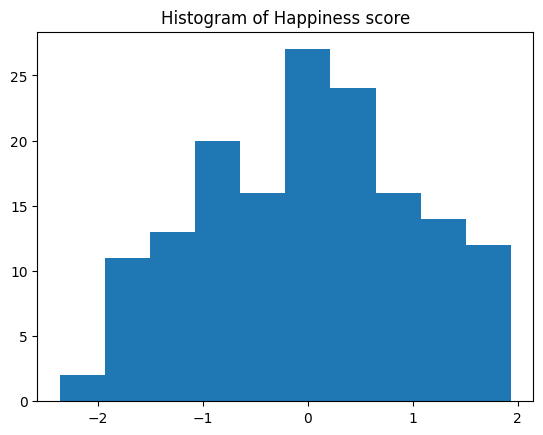

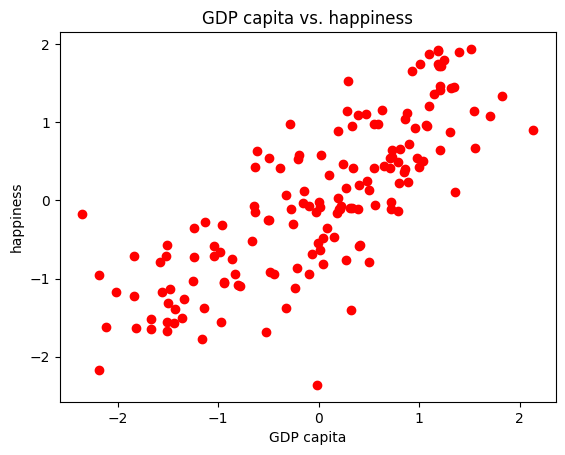

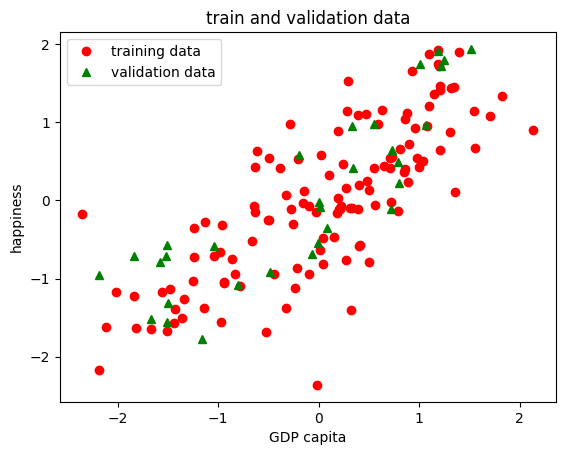

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [13]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(row[selectedVariable]) if row[selectedVariable] != '' else None for row in data]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(row[selectedOutput]) for row in data]

    # calculam media la valorile input
    values = [float(row[selectedVariable]) for row in data if row[selectedVariable] != '' and row[selectedVariable] != 0]
    mean_value = sum(values) / len(values)
    
    # Înlocuim valorile nule cu media calculată
    for i in range(len(inputs)):
        if inputs[i] is None or inputs[i]==0:
            inputs[i] = mean_value

    inputs = standardNormalize(inputs)
    outputs = standardNormalize(outputs)
    
    return inputs, outputs
    
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'D:/FACULTATE/SEM4/AI/Lab5/v1_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])


def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, 'capita GDP')
plotDataHistogram(outputs, 'Happiness score')


plt.plot(inputs, outputs, 'ro') 
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()

np.random.seed(5)
indexes = [i for i in range(len(inputs))]

trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data 
plt.plot(validationInputs, validationOutputs, 'g^', label = 'validation data')     #test data 
plt.title('train and validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

xx = [[el] for el in trainInputs]


regressor = MyLinearUnivariateRegression()
regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')


# plot the learnt model
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data 
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model 
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()


computedValidationOutputs = regressor.predict([[x] for x in validationInputs])


plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')  #computed test data 
plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')  #real test data 
plt.title('computed validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()


error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print("Normalizat:")
print('prediction error (manual): ', error)


from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)


print("Fara normalizare:")
print("prediction error (manual):  0.4217937620387563")
print("prediction error (tool):   0.4217937620387562")